In [ ]:
!pip install h5py

import h5py
import numpy as np
import pandas as pd

In [ ]:
!pip install tqdm


In [ ]:
import gzip
import shutil
from tqdm import tqdm
import os

# Define the input and output file names
input_file = 'ITOP_side_test_labels.h5.gz'
output_file = 'ITOP_side_test_labels.h5'

# Get the file size for the progress bar
file_size = os.path.getsize(input_file)

# Unzip the file with a progress bar
with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        with tqdm(total=file_size, unit='B', unit_scale=True, desc='Unzipping') as pbar:
            for chunk in iter(lambda: f_in.read(1024), b''):
                f_out.write(chunk)
                pbar.update(len(chunk))


Unzipping: 808MB [00:13, 59.3MB/s]


In [ ]:
import h5py

# Open the HDF5 file
with h5py.File(output_file, 'r') as hdf:
    # List all groups
    print("Keys: %s" % hdf.keys())

    # Iterate through each dataset and print its shape
    for key in hdf.keys():
        data = hdf.get(key)
        print(f"Shape of {key}: {data.shape}")


Keys: <KeysViewHDF5 ['id', 'image_coordinates', 'is_valid', 'real_world_coordinates', 'segmentation', 'visible_joints']>
Shape of id: (10501,)
Shape of image_coordinates: (10501, 15, 2)
Shape of is_valid: (10501,)
Shape of real_world_coordinates: (10501, 15, 3)
Shape of segmentation: (10501, 240, 320)
Shape of visible_joints: (10501, 15)


In [ ]:
import h5py

# Define the file name
file_name = 'ITOP_side_test_labels.h5'

# Open the HDF5 file
with h5py.File(file_name, 'r') as hdf:
    # Read the is_valid dataset
    is_valid = hdf['is_valid'][:]

    # Find all indexes where is_valid is 1
    valid_indexes = [i for i, valid in enumerate(is_valid) if valid == 1]

    # Print the valid indexes
    print(f'Indexes where is_valid is 1: {valid_indexes}')


Indexes where is_valid is 1: [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 85, 87, 88, 92, 93, 94, 95, 96, 97, 98, 106, 107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 145, 163, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 192, 193, 194, 217, 218, 219, 220, 221, 222, 223, 226, 228, 238, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 294, 295, 296, 297, 298, 299, 300, 302, 303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 

In [ ]:
# Define the index
index = 2312

# Open the HDF5 file
with h5py.File(output_file, 'r') as hdf:
    # Read the required datasets
    is_valid = hdf['is_valid'][index]
    visible_joints = hdf['visible_joints'][index]
    real_world_coordinates = hdf['real_world_coordinates'][index]

    # Print the values
    print(f'is_valid for index {index}: {is_valid}')
    print(f'visible_joints for index {index}: {visible_joints}')

is_valid for index 2312: 1
visible_joints for index 2312: [1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]


Indexes where is_valid is 1: [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 85, 87, 88, 92, 93, 94, 95, 96, 97, 98, 106, 107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 145, 163, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 192, 193, 194, 217, 218, 219, 220, 221, 222, 223, 226, 228, 238, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 294, 295, 296, 297, 298, 299, 300, 302, 303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 

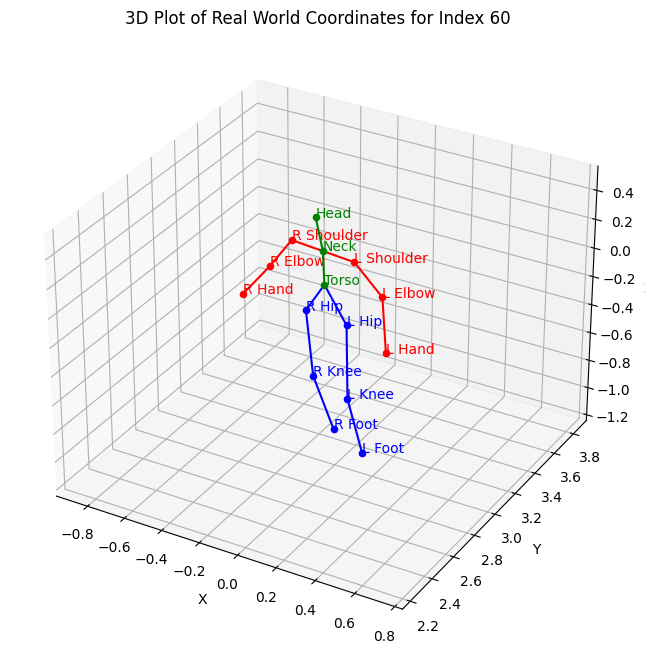

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the file name
file_name = 'ITOP_side_test_labels.h5'

# Define the joint ID to name mapping
joint_id_to_name = {
    0: 'Head',        8: 'Torso',
    1: 'Neck',        9: 'R Hip',
    2: 'R Shoulder',  10: 'L Hip',
    3: 'L Shoulder',  11: 'R Knee',
    4: 'R Elbow',     12: 'L Knee',
    5: 'L Elbow',     13: 'R Foot',
    6: 'R Hand',      14: 'L Foot',
    7: 'L Hand',
}

# Define color mapping based on joint names
joint_colors = {
    'Head': 'green', 'Neck': 'green', 'Torso': 'green',
    'R Hip': 'blue', 'L Hip': 'blue', 'R Knee': 'blue', 'L Knee': 'blue', 'R Foot': 'blue', 'L Foot': 'blue',
    'R Shoulder': 'red', 'L Shoulder': 'red', 'R Elbow': 'red', 'L Elbow': 'red', 'R Hand': 'red', 'L Hand': 'red'
}

# Open the HDF5 file
with h5py.File(file_name, 'r') as hdf:
    # Read the datasets
    is_valid = hdf['is_valid'][:]
    visible_joints_all = hdf['visible_joints'][:]
    real_world_coordinates_all = hdf['real_world_coordinates'][:]

    # Find all indexes where is_valid is 1
    valid_indexes = [i for i, valid in enumerate(is_valid) if valid == 1]
    print(f'Indexes where is_valid is 1: {valid_indexes}')

    # Choose an index to plot (e.g., the first valid index)
    index = valid_indexes[7]

    # Get the data for the chosen index
    visible_joints = visible_joints_all[index]
    real_world_coordinates = real_world_coordinates_all[index]

    # Print the values
    print(f'is_valid for index {index}: {is_valid[index]}')
    print(f'visible_joints for index {index}: {visible_joints}')

    # Extract the coordinates of the visible joints
    visible_coordinates = real_world_coordinates[visible_joints == 1]
    visible_joint_ids = np.where(visible_joints == 1)[0]

    # Plot the 3D coordinates
    fig = plt.figure(figsize=(12, 8))  # Increase the figure size
    ax = fig.add_subplot(111, projection='3d')

    # Plot the visible joints with labels
    for joint_id in visible_joint_ids:
        joint_name = joint_id_to_name[joint_id]
        color = joint_colors[joint_name]
        ax.scatter(real_world_coordinates[joint_id, 0], real_world_coordinates[joint_id, 2], real_world_coordinates[joint_id, 1], c=color, label=joint_name)
        ax.text(real_world_coordinates[joint_id, 0], real_world_coordinates[joint_id, 2], real_world_coordinates[joint_id, 1], '%s' % (joint_name), size=10, zorder=1, color=color)

    connect = [[0,1], [2,1], [3,1], [2, 4], [3,5], [4,6], [5,7], [1, 8], [9,8], [10, 8], [9,11], [10,12], [11, 13], [12, 14]]
    for pair in connect:
      ax.plot([real_world_coordinates[pair[0], 0], real_world_coordinates[pair[1], 0]],
       [real_world_coordinates[pair[0], 2], real_world_coordinates[pair[1], 2]],
        [real_world_coordinates[pair[0], 1], real_world_coordinates[pair[1], 1]],
              c=joint_colors[joint_id_to_name[pair[0]]])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Plot of Real World Coordinates for Index {index}')

    # Set equal scaling
    max_range = np.array([real_world_coordinates[:, 0].max() - real_world_coordinates[:, 0].min(),
                          real_world_coordinates[:, 2].max() - real_world_coordinates[:, 2].min(),
                          real_world_coordinates[:, 1].max() - real_world_coordinates[:, 1].min()]).max() / 2.0

    mid_x = (real_world_coordinates[:, 0].max() + real_world_coordinates[:, 0].min()) * 0.5
    mid_y = (real_world_coordinates[:, 2].max() + real_world_coordinates[:, 2].min()) * 0.5
    mid_z = (real_world_coordinates[:, 1].max() + real_world_coordinates[:, 1].min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()


# SKELETON CLASS


####MAKE JSON SKELETON

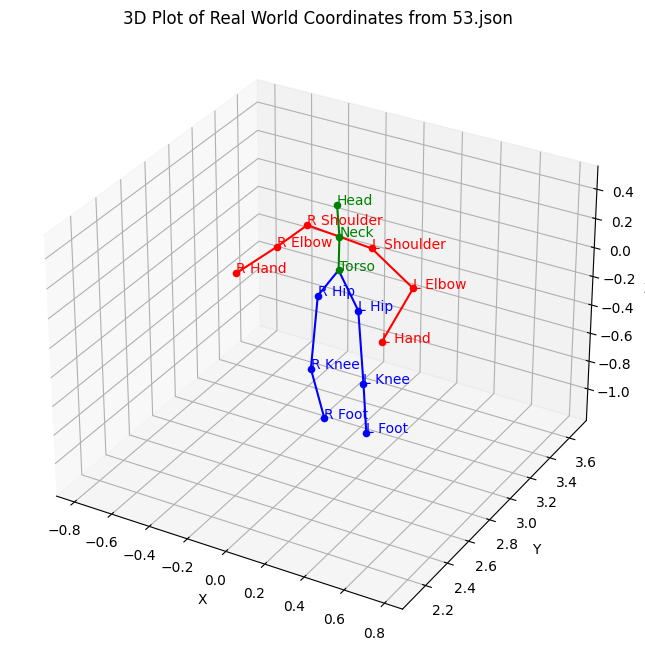

In [ ]:
import h5py
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the file name
file_name = 'ITOP_side_test_labels.h5'

# Define the joint ID to name mapping
joint_id_to_name = {
    0: 'Head',        8: 'Torso',
    1: 'Neck',        9: 'R Hip',
    2: 'R Shoulder',  10: 'L Hip',
    3: 'L Shoulder',  11: 'R Knee',
    4: 'R Elbow',     12: 'L Knee',
    5: 'L Elbow',     13: 'R Foot',
    6: 'R Hand',      14: 'L Foot',
    7: 'L Hand',
}

# Define color mapping based on joint names
joint_colors = {
    'Head': 'green', 'Neck': 'green', 'Torso': 'green',
    'R Hip': 'blue', 'L Hip': 'blue', 'R Knee': 'blue', 'L Knee': 'blue', 'R Foot': 'blue', 'L Foot': 'blue',
    'R Shoulder': 'red', 'L Shoulder': 'red', 'R Elbow': 'red', 'L Elbow': 'red', 'R Hand': 'red', 'L Hand': 'red'
}

def save_coordinates_to_json(index, file_name='ITOP_side_test_labels.h5'):
    with h5py.File(file_name, 'r') as hdf:
        is_valid = hdf['is_valid'][:]
        visible_joints_all = hdf['visible_joints'][:]
        real_world_coordinates_all = hdf['real_world_coordinates'][:]

        if is_valid[index] != 1:
            print(f"Index {index} is not valid")
            return

        visible_joints = visible_joints_all[index]
        real_world_coordinates = real_world_coordinates_all[index]

        data = {
            'visible_joints': visible_joints.tolist(),
            'real_world_coordinates': real_world_coordinates.tolist()
        }

        with open(f'{index}.json', 'w') as f:
            json.dump(data, f)

def plot_skeleton_from_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    visible_joints = np.array(data['visible_joints'])
    real_world_coordinates = np.array(data['real_world_coordinates'])

    visible_coordinates = real_world_coordinates[visible_joints == 1]
    visible_joint_ids = np.where(visible_joints == 1)[0]

    fig = plt.figure(figsize=(12, 8))  # Increase the figure size
    ax = fig.add_subplot(111, projection='3d')

    # Plot the visible joints with labels
    for joint_id in visible_joint_ids:
        joint_name = joint_id_to_name[joint_id]
        color = joint_colors[joint_name]
        ax.scatter(real_world_coordinates[joint_id, 0], real_world_coordinates[joint_id, 2], real_world_coordinates[joint_id, 1], c=color, label=joint_name)
        ax.text(real_world_coordinates[joint_id, 0], real_world_coordinates[joint_id, 2], real_world_coordinates[joint_id, 1], '%s' % (joint_name), size=10, zorder=1, color=color)

    connect = [[0,1], [2,1], [3,1], [2, 4], [3,5], [4,6], [5,7], [1, 8], [9,8], [10, 8], [9,11], [10,12], [11, 13], [12, 14]]
    for pair in connect:
        if pair[0] in visible_joint_ids and pair[1] in visible_joint_ids:
            ax.plot([real_world_coordinates[pair[0], 0], real_world_coordinates[pair[1], 0]],
                    [real_world_coordinates[pair[0], 2], real_world_coordinates[pair[1], 2]],
                    [real_world_coordinates[pair[0], 1], real_world_coordinates[pair[1], 1]],
                    c=joint_colors[joint_id_to_name[pair[0]]])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Plot of Real World Coordinates from {json_file}')

    # Set equal scaling
    max_range = np.array([visible_coordinates[:, 0].max() - visible_coordinates[:, 0].min(),
                          visible_coordinates[:, 2].max() - visible_coordinates[:, 2].min(),
                          visible_coordinates[:, 1].max() - visible_coordinates[:, 1].min()]).max() / 2.0

    mid_x = (visible_coordinates[:, 0].max() + visible_coordinates[:, 0].min()) * 0.5
    mid_y = (visible_coordinates[:, 2].max() + visible_coordinates[:, 2].min()) * 0.5
    mid_z = (visible_coordinates[:, 1].max() + visible_coordinates[:, 1].min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

# Example usage
index = 53  # Replace with the desired index
save_coordinates_to_json(index)
plot_skeleton_from_json(f'{index}.json')


The angle between the joints is 0.3237897619553007 degrees
The angle between the neck-torso vector and the joint vector is 144.4058622137934 degrees
The angle between the joint vector and the x-axis is 127.89209340269292 degrees


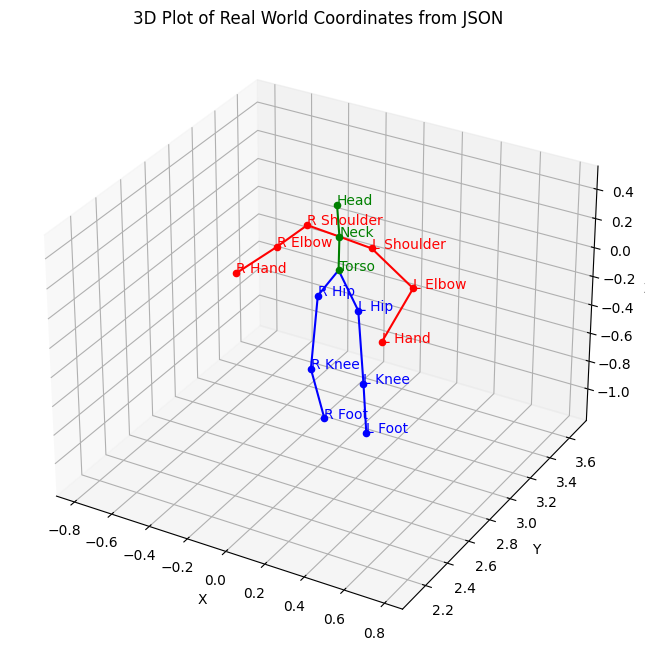

In [ ]:
import h5py
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO
from PIL import Image

# Define the file name
file_name = 'ITOP_side_test_labels.h5'

# Define the joint ID to name mapping
joint_id_to_name = {
    0: 'Head',        8: 'Torso',
    1: 'Neck',        9: 'R Hip',
    2: 'R Shoulder',  10: 'L Hip',
    3: 'L Shoulder',  11: 'R Knee',
    4: 'R Elbow',     12: 'L Knee',
    5: 'L Elbow',     13: 'R Foot',
    6: 'R Hand',      14: 'L Foot',
    7: 'L Hand',
}

# Define color mapping based on joint names
joint_colors = {
    'Head': 'green', 'Neck': 'green', 'Torso': 'green',
    'R Hip': 'blue', 'L Hip': 'blue', 'R Knee': 'blue', 'L Knee': 'blue', 'R Foot': 'blue', 'L Foot': 'blue',
    'R Shoulder': 'red', 'L Shoulder': 'red', 'R Elbow': 'red', 'L Elbow': 'red', 'R Hand': 'red', 'L Hand': 'red'
}

class Skeleton:
    def __init__(self, json_file):
        with open(json_file, 'r') as f:
            data = json.load(f)

        self.visible_joints = np.array(data['visible_joints'])
        self.real_world_coordinates = np.array(data['real_world_coordinates'])
        self.visible_coordinates = self.real_world_coordinates[self.visible_joints == 1]
        self.visible_joint_ids = np.where(self.visible_joints == 1)[0]

    def plot_skeleton(self, save_path=None):
        fig = plt.figure(figsize=(12, 8))  # Increase the figure size
        ax = fig.add_subplot(111, projection='3d')

        # Plot the visible joints with labels
        for joint_id in self.visible_joint_ids:
            joint_name = joint_id_to_name[joint_id]
            color = joint_colors[joint_name]
            ax.scatter(self.real_world_coordinates[joint_id, 0], self.real_world_coordinates[joint_id, 2], self.real_world_coordinates[joint_id, 1], c=color, label=joint_name)
            ax.text(self.real_world_coordinates[joint_id, 0], self.real_world_coordinates[joint_id, 2], self.real_world_coordinates[joint_id, 1], '%s' % (joint_name), size=10, zorder=1, color=color)

        connect = [[0,1], [2,1], [3,1], [2, 4], [3,5], [4,6], [5,7], [1, 8], [9,8], [10, 8], [9,11], [10,12], [11, 13], [12, 14]]
        for pair in connect:
            if pair[0] in self.visible_joint_ids and pair[1] in self.visible_joint_ids:
                ax.plot([self.real_world_coordinates[pair[0], 0], self.real_world_coordinates[pair[1], 0]],
                        [self.real_world_coordinates[pair[0], 2], self.real_world_coordinates[pair[1], 2]],
                        [self.real_world_coordinates[pair[0], 1], self.real_world_coordinates[pair[1], 1]],
                        c=joint_colors[joint_id_to_name[pair[0]]])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'3D Plot of Real World Coordinates from JSON')

        # Set equal scaling
        max_range = np.array([self.visible_coordinates[:, 0].max() - self.visible_coordinates[:, 0].min(),
                              self.visible_coordinates[:, 2].max() - self.visible_coordinates[:, 2].min(),
                              self.visible_coordinates[:, 1].max() - self.visible_coordinates[:, 1].min()]).max() / 2.0

        mid_x = (self.visible_coordinates[:, 0].max() + self.visible_coordinates[:, 0].min()) * 0.5
        mid_y = (self.visible_coordinates[:, 2].max() + self.visible_coordinates[:, 2].min()) * 0.5
        mid_z = (self.visible_coordinates[:, 1].max() + self.visible_coordinates[:, 1].min()) * 0.5

        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

        if save_path:
            plt.savefig(save_path)
        else:
            buf = BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            plt.close(fig)
            return Image.open(buf)

    def calc_angle_jjj(self, index1, index2, index3):
        # Get the coordinates of the three joints
        p1 = self.real_world_coordinates[index1]
        p2 = self.real_world_coordinates[index2]
        p3 = self.real_world_coordinates[index3]

        # Calculate the vectors
        v1 = p1 - p2
        v2 = p3 - p2

        # Calculate the angle between the vectors
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        cos_angle = dot_product / (norm_v1 * norm_v2)
        angle = np.arccos(cos_angle)  # angle in radians

        return np.degrees(angle)  # convert to degrees

    def calc_angle_jbody(self, index1, index2):
        # Indices for neck and torso
        neck_index = 1  # Assuming neck is at index 1
        torso_index = 8  # Assuming torso is at index 8

        # Get the coordinates of the joints
        neck = self.real_world_coordinates[neck_index]
        torso = self.real_world_coordinates[torso_index]
        joint1 = self.real_world_coordinates[index1]
        joint2 = self.real_world_coordinates[index2]

        # Calculate the vectors
        v1 = neck - torso
        v2 = joint2 - joint1

        # Calculate the angle between the vectors
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        cos_angle = dot_product / (norm_v1 * norm_v2)
        angle = np.arccos(cos_angle)  # angle in radians

        return np.degrees(angle)  # convert to degrees

    def calc_angle_jaxes(self, index1, index2, axis):
        # Get the coordinates of the joints
        joint1 = self.real_world_coordinates[index1]
        joint2 = self.real_world_coordinates[index2]

        # Calculate the vector between the two joints
        v = joint2 - joint1

        # Define the unit vector for the specified axis
        if axis == 0:  # x-axis
            axis_vector = np.array([1, 0, 0])
        elif axis == 1:  # y-axis
            axis_vector = np.array([0, 1, 0])
        elif axis == 2:  # z-axis
            axis_vector = np.array([0, 0, 1])
        else:
            raise ValueError("Axis must be 0 (x), 1 (y), or 2 (z)")

        # Calculate the angle between the vector and the axis
        dot_product = np.dot(v, axis_vector)
        norm_v = np.linalg.norm(v)
        norm_axis = np.linalg.norm(axis_vector)
        cos_angle = dot_product / (norm_v * norm_axis)
        angle = np.arccos(cos_angle)  # angle in radians

        return np.degrees(angle)  # convert to degrees

# Example usage
index = 53 # Replace with the desired index
save_coordinates_to_json(index)
skeleton = Skeleton(f'{index}.json')
# To save the plot as an image file
skeleton.plot_skeleton('skeleton_plot.png')

# To get the plot as an image object
img = skeleton.plot_skeleton()
img.show()

# Calculate the angle between three joints
angle_jjj = skeleton.calc_angle_jjj(1, 2, 3)  # Replace with the desired joint IDs
print(f'The angle between the joints is {angle_jjj} degrees')

# Calculate the angle between the neck-torso vector and a vector defined by two joints
angle_jbody = skeleton.calc_angle_jbody(2, 4)  # Replace with the desired joint IDs
print(f'The angle between the neck-torso vector and the joint vector is {angle_jbody} degrees')

# Calculate the angle between a vector defined by two joints and one of the axes
angle_jaxes = skeleton.calc_angle_jaxes(2, 4, 0)  # Replace with the desired joint IDs and axis (0, 1, or 2)
print(f'The angle between the joint vector and the x-axis is {angle_jaxes} degrees')
